In [1]:
import numpy as np, matplotlib.pyplot as plt
# from importlib import reload
import cvflow as cf
% matplotlib inline

In [2]:
import laneFindingPipeline

In [3]:
show = cf.misc.show

In [4]:
colorFilter = cf.ComplexPipeline()

HBox(children=(IntProgress(value=0, description='cal. undistort: ', max=20), HTML(value='')))

In [5]:
laneFinder = laneFindingPipeline.LaneFinder(colorFilter=colorFilter)

In [6]:
allFrames = laneFindingPipeline.utils.loadFrames(videoPrefices=('project',), maxframes=100)

HBox(children=(IntProgress(value=0, description='load project: '), HTML(value='')))

In [7]:
frame = allFrames['project'][0]

Some lane markings failed inspection!
Some lane markings failed inspection!
(recursion #1)


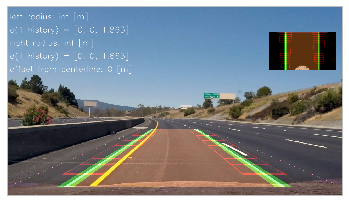

In [8]:
show(laneFinder.draw(frame));

CPU times: user 5.16 s, sys: 3.26 s, total: 8.42 s
Wall time: 4.75 s


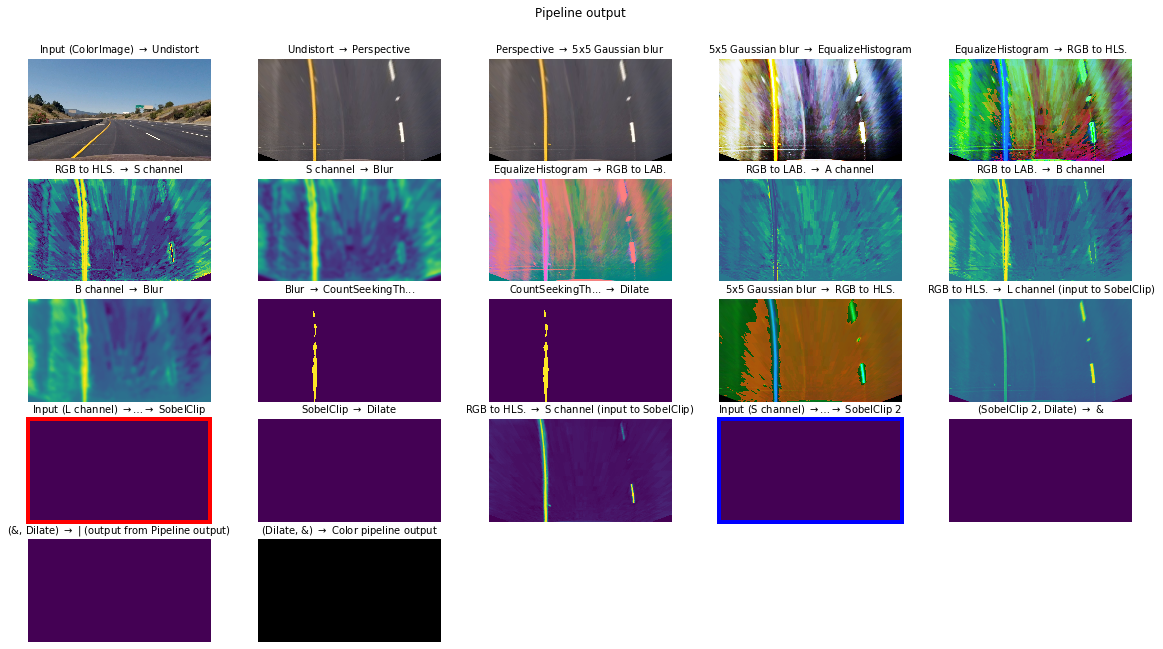

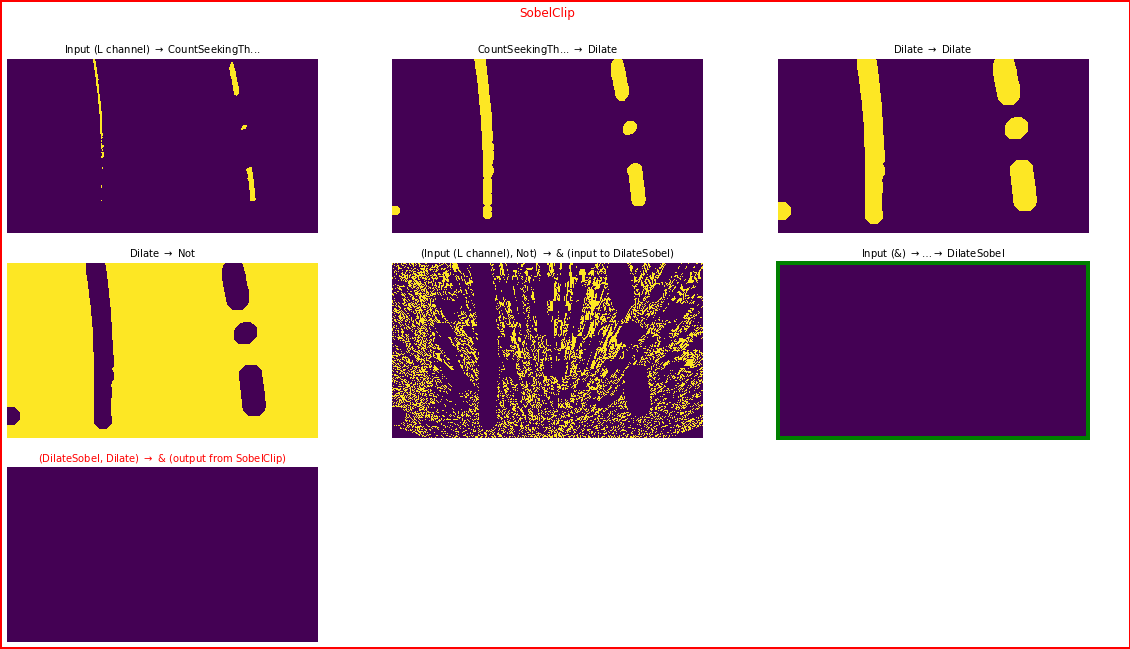

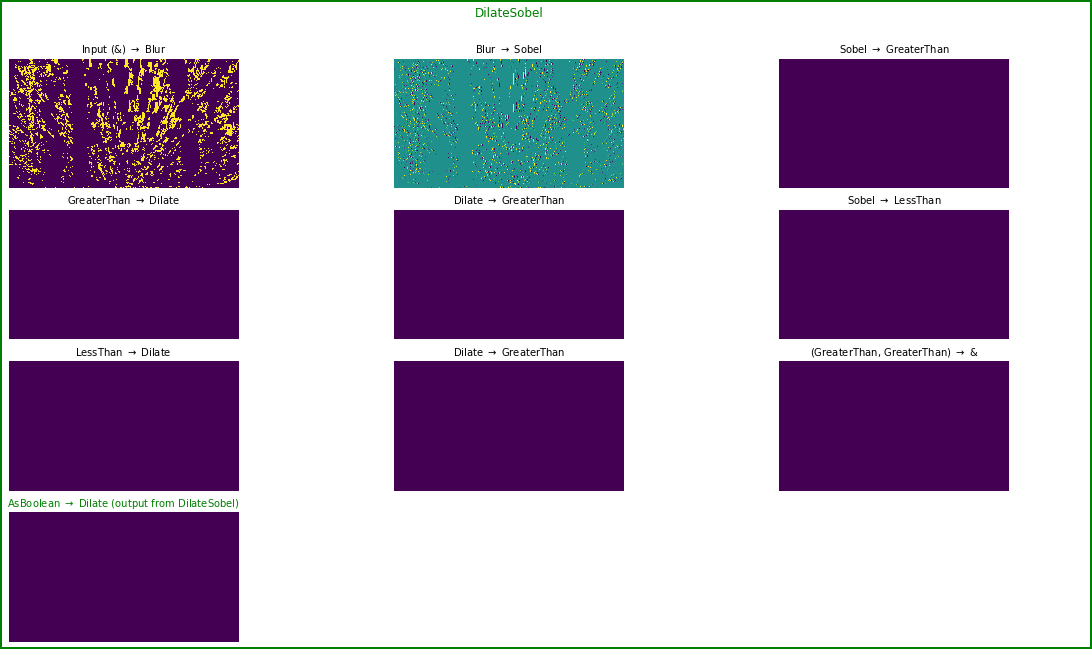

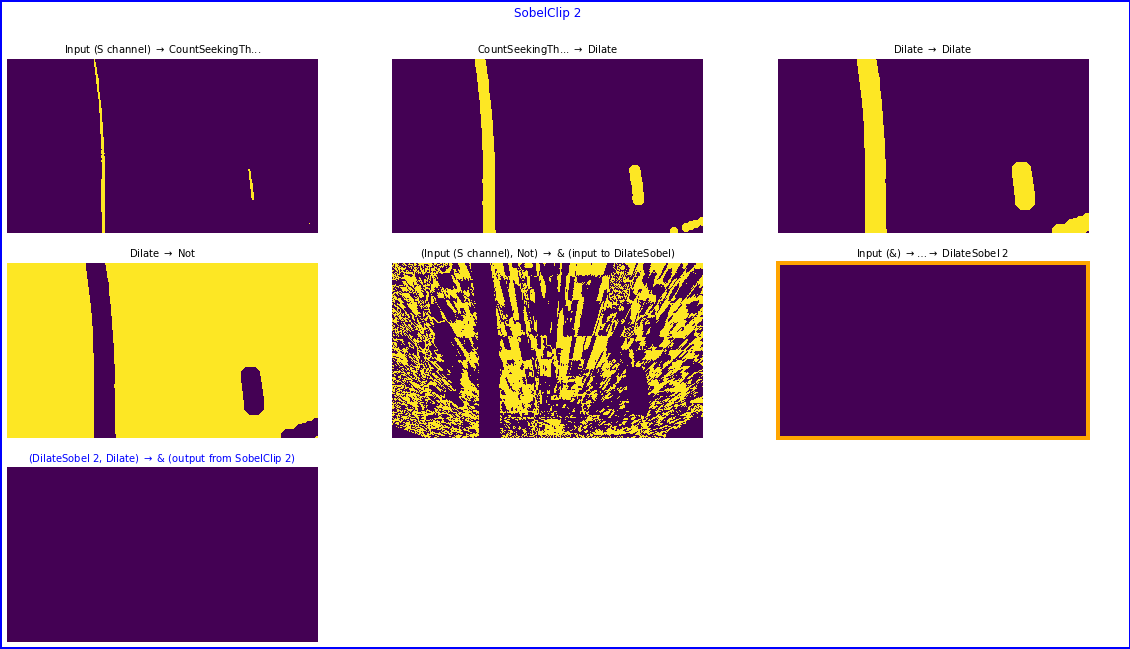

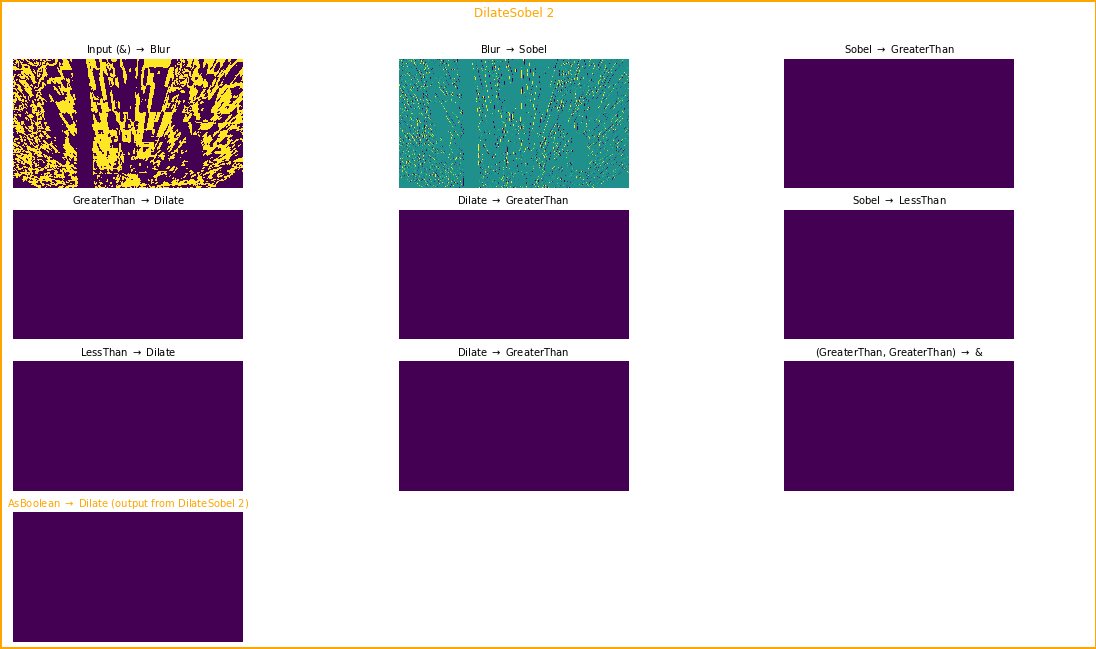

In [11]:
%%time
figs = colorFilter.showMembers(subplotKwargs=dict(figsize=(16,9)), wspace=0)
for ext in ('png',):
    for fig in figs:
        label = fig.texts[0].get_text()
        ok = 'abcdefghijklmnopqrstuvwxyz'
        ok += ok.upper() + '01234567890-'
        for ch in label:
            if ch not in ok:
                label.replace(ch, '_')


In [12]:
colorFilter.draw(savePath='/tmp/test', format='pdf');

Saved to /tmp/test.pdf.


In [13]:
sc = colorFilter.getMembersByType(cf.SobelClip)[1]

In [14]:
sc.output.parent().getSimpleName()

'& (output from SobelClip 2)'

In [15]:
raise RuntimeError

RuntimeError: 

In [ ]:
import utils

Measure frames per second without plotting.

In [ ]:
%%time
import tqdm
for frame in tqdm.tqdm_notebook(allFrames['project'][:100], unit='frame'):
    laneFinder(frame)

In [ ]:
utils.transformVideo(allFrames['project'], 'cf-%s.mp4' % laneFinder.colorFilter, laneFinder.draw)